## Formulación del problema.

To solve an interesting letter recognition problem using SVMs. It contains the 26 English alphabets as classes, so it's a multiclass classification problem with 26 classes.

Each row in the data set represents an image of a handwritten alphabet. Using some basic image processing, the images are converted into m X n pixels, where m and n depend on the size and resolution of the original image. Each pixel contains numeric values, with higher values denoting the presence of dense 'ink'. In the pixels where nothing is written, the pixel value is 0.

A pixel is called 'on' if it contains to a positive numeric value, else it is called 'off'.

Using the pixelated images, 16 features are derived for each image, such as the width of the box, the ratio of the mean variance of x divided by the width of the box, etc.

## Recolección de datos.
* #### Link: https://www.kaggle.com/datasets/nishan192/letterrecognition-using-svm

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/letterrecognition-using-svm/letter-recognition.csv


## Análisis Exploratorio (básico).

In [2]:
data = pd.read_csv("/kaggle/input/letterrecognition-using-svm/letter-recognition.csv")
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
data.shape

(20000, 17)

In [4]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [5]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
data.duplicated().sum()

1332

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
np.sort(data[data.duplicated()]["letter"].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [9]:
data[data.duplicated()]["letter"].value_counts()

I    231
X    109
N     95
Z     94
L     88
M     60
V     58
T     48
U     45
D     45
E     43
Y     40
B     36
O     35
A     33
J     32
G     30
H     30
C     26
W     26
Q     23
F     23
K     21
P     21
R     21
S     19
Name: letter, dtype: int64

### Descripción del dataset:
* #### Contiene 20000 filas/observaciones y 17 columnas/variables, una de las cuales es la variable objetivo ("letter").
* #### La variable objetivo es categórica y las 16 restantes son numéricas.
* #### No tiene valores nulos el dataset.
* #### Tiene 1332 filas duplicadas. Para el análisis categórico de este dataset nos conviene tener observaciones duplicadas.

## Preprocesado de datos.
* #### Se dividirán los datos en datos de entrenamiento y datos de prueba.
* #### Se normalizarán las variables independientes numéricas.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(["letter"], axis=1)
Y = data["letter"]
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(14000, 6000, 14000, 6000)

## Construcción del modelo. 
* #### Vamos a elegir los mejores parametros del modelado realizando una validación cruzada.

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        "C": [1,10,100,1000]
    },
    {
        "kernel":["linear"],
        "C": [1,10,100,1000]
    },
    {
        "kernel":["poly"],
        "C": [1,10,100,1000]
    }
]

In [17]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"),
                  param_grid=parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}])

In [18]:
clf.best_params_

{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}

In [19]:
y_pred = clf.predict(x_test)

In [20]:
y_pred

array(['Y', 'B', 'K', ..., 'M', 'J', 'M'], dtype=object)

* #### Los mejores parametros para support vector machine son kernel radial basis function, C=1000 y gamma=0.5.
* #### De todas maneras esta validación ha tardado bastante tiempo ya que el dataset es muy grande. El svm es conveniente para datasets pequeños y mejor si tiene mayor cantidad de rasgos que de observaciones. Pero a proposito de aprender y practicar SVM es que opto por utilizar SVM para modelar.

## Evaluación del modelo.

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       216
           B       0.93      0.94      0.94       239
           C       0.95      0.97      0.96       229
           D       0.93      0.96      0.95       248
           E       0.92      0.93      0.93       221
           F       0.96      0.96      0.96       246
           G       0.95      0.92      0.93       256
           H       0.89      0.95      0.92       202
           I       0.98      0.96      0.97       218
           J       0.97      0.95      0.96       233
           K       0.92      0.95      0.93       207
           L       0.98      0.98      0.98       231
           M       0.99      0.99      0.99       251
           N       0.97      0.98      0.98       223
           O       0.97      0.95      0.96       226
           P       0.97      0.96      0.96       249
           Q       0.98      0.96      0.97       215
           R       0.94    

In [23]:
mat = confusion_matrix(y_test, y_pred)

<Axes: >

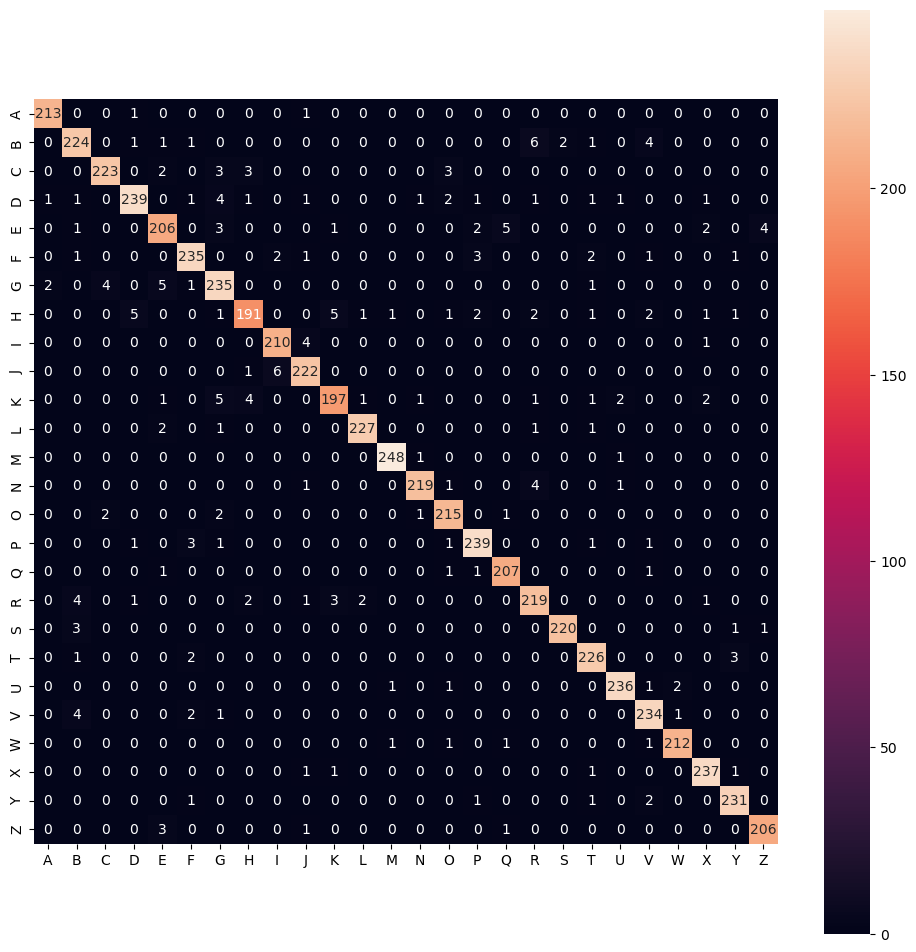

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
           cbar=True,xticklabels=np.sort(y_test.unique()),
           yticklabels=np.sort(y_test.unique()))